In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# Load the data exported from code/data_processing/process_fg_data
PATH = '../../data/processed/

In [4]:
# Load all data
w = pd.read_csv(os.path.join(PATH, 'width_wet_cells.csv'))
d = pd.read_csv(os.path.join(PATH, 'depth_wet_cells.csv'))
wd = pd.read_csv(os.path.join(PATH, 'width_depth_wet_cells.csv'))
rall = pd.read_csv(os.path.join(PATH, 'rall_wet_cells.csv'))
west = pd.read_csv(os.path.join(PATH, 'west_wet_cells.csv'))
east = pd.read_csv(os.path.join(PATH, 'east_wet_cells.csv'))

# Combine into a single dataframe
df = pd.concat([w, d,wd, rall, east, west], axis=0)

wet_inundation.loc[(wet_inundation['diff_no_breach'] - wet_inundation['diff_no_breach'].median()).abs().argsort()[:1]]

In [6]:
wet_inundation = df[['diff_no_breach', 'total_breach_area', 'Unnamed: 0', 'num_breaches', 'mean_distance','percent_island']]
wet_inundation['diff_no_breach'] *= 18**2

/tmp/ipykernel_25643/2446335814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_inundation['diff_no_breach'] *= 18**2


In [6]:
wet_inundation.loc[wet_inundation['Unnamed: 0'] == 'd_0279_6']#['total_breach_area']/1000**2 # - wet_inundation['diff_no_breach'].median()).abs().argsort(),:]

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance
68,8764524.0,1769.439524,d_0279_6,6.0,329.765132


In [7]:
wet_inundation.loc[wet_inundation['Unnamed: 0'] == 'w_0435_6']

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance
75,13078260.0,5893.725443,w_0435_6,6.0,491.143787


In [8]:
# wet_inundation.loc[wet_inundation['diff_no_breach'].median()]#['diff_no_breach']/1000**2
# wet_inundation.loc[wet_inundation['total_breach_area'] == wet_inundation['total_breach_area'].min()]
wet_inundation.loc[(wet_inundation['diff_no_breach'] - wet_inundation['diff_no_breach'].mean()).abs().argsort()[:1]]
# wet_inundation.loc[wet_inundation['Unnamed: 0'] == 'w_0435_6']['diff_no_breach']/1000**2

KeyError: "None of [Int64Index([1283], dtype='int64')] are in the [index]"

In [7]:
import matplotlib.pyplot as plt
plt.style.use('./mystyle.mplstyle')
# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     "text.usetex": True,     # use inline math for ticks
#     "pgf.rcfonts": False     # don't setup fonts from rc parameters
#     })

In [9]:
# wet_inundation['mean_depth'] = abs(wet_inundation['mean_depth'])
wet_inundation['diff_no_breach'].min()/1000**2

0.162324

/tmp/ipykernel_25643/2776899144.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = wet_inundation.groupby('breach_category')


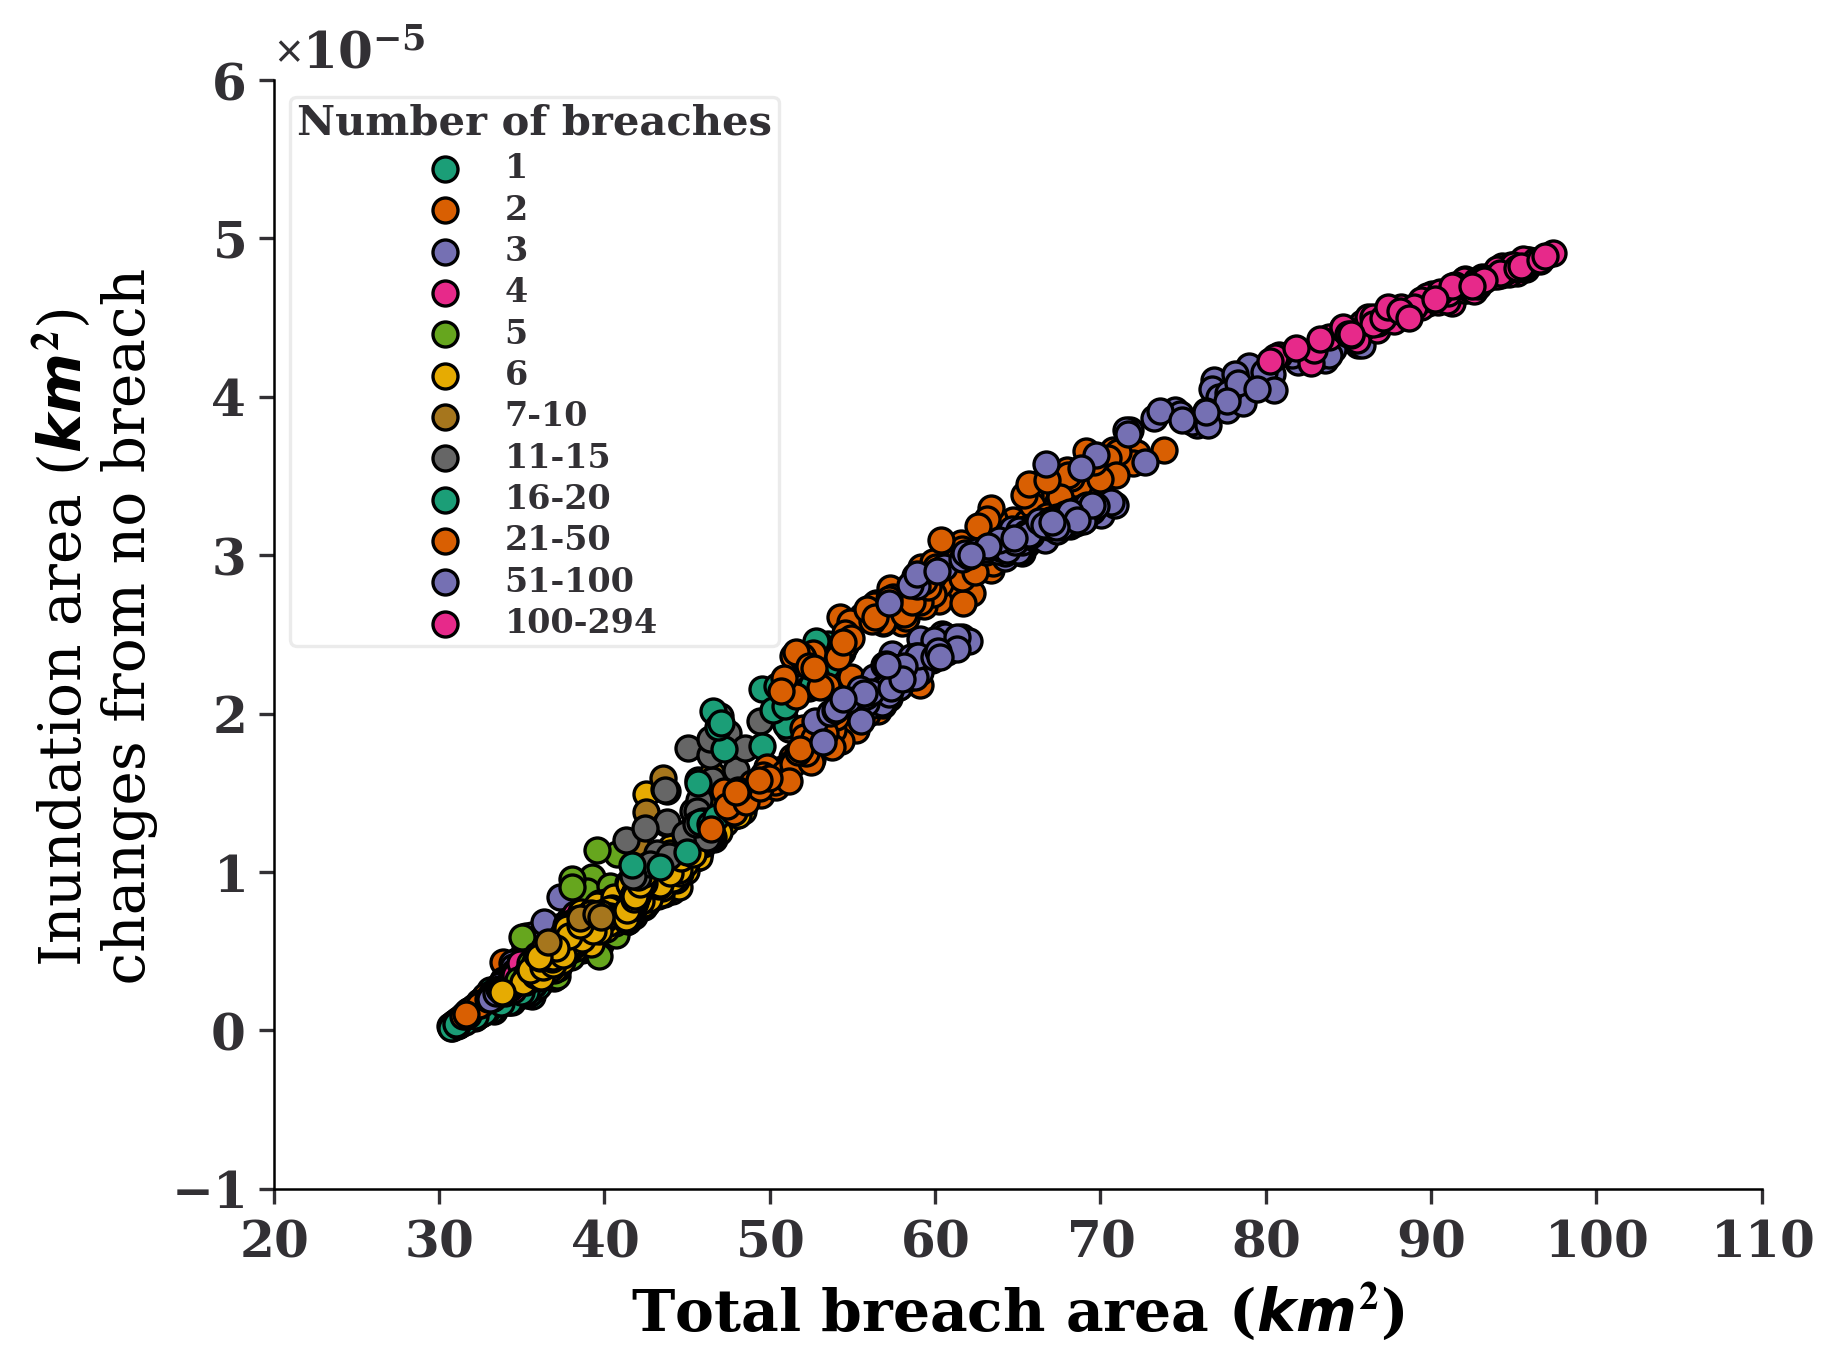

In [35]:
import matplotlib as mpl
# mpl.use('agg')
max_b = int(wet_inundation['num_breaches'].max())
min_b = int(wet_inundation['num_breaches'].min())
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

# num_plots=20
# color_source = np.linspace(0,1,num_plots)
# color_repeat = np.repeat(color_source,2)

# plt.gca().set_prop_cycle(plt.cycler('color',plt.cm.tab20b(color_repeat)))
bins = [1,2,3,4,5,6,7, 10, 15, 20, 50, 100, max_b]
labels=['1', '2', '3', '4', '5', '6', '7-10', '11-15', '16-20', '21-50', '51-100', f'100-{max_b}']
wet_inundation['breach_category'] = pd.cut(wet_inundation['num_breaches'], bins=bins, labels=labels, right=False)
grouped_data = wet_inundation.groupby('breach_category')
for label, group in grouped_data:
        plt.scatter(group['total_island_breached'], group['diff_no_breach']/1000**2, label=f'{label}')
        

# for i in range(max_b, min_b - 1, -1):
#     if 100 < i:
#         p = wet_inundation.loc[wet_inundation['num_breaches'] > 100]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2, label=r'100-295 breaches')
#     elif 50 < i <= 100:
#         p = wet_inundation.loc[wet_inundation['num_breaches'].between(50,100, inclusive='right')]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2, label=r'50-100 breaches')
#     elif 20 < i <= 50:
#         p = wet_inundation.loc[wet_inundation['num_breaches'].between(20,50, inclusive='right')]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2, label=r'20-50 breaches')
#     elif 15 < i <= 20:
#         p = wet_inundation.loc[wet_inundation['num_breaches'].between(15, 20, inclusive='right')]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2, label=r'15-20 breaches')
#     elif 10 < i <= 15:
#         p = wet_inundation.loc[wet_inundation['num_breaches'].between(10,15, inclusive='right')]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2, label=r'10-15 breaches')
#     elif 6 < i <= 10:
#         p = wet_inundation.loc[wet_inundation['num_breaches'].between(6,10, inclusive='right')]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2, label=r' 6 - 10 breaches')
#     else:
#         p = wet_inundation.loc[wet_inundation['num_breaches'] == i]
#         plt.scatter(p['total_breach_area']/1000**2, p['diff_no_breach']/1000**2,  label=f'{i} breaches')
plt.rcParams["font.weight"] = "bold"
plt.xlabel('Total breach area ($km^2$)',fontweight='bold')
plt.ylabel('Inundation area ($km^2$) \n changes from no breach')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Number of breaches')
ax = plt.gca()
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.xlim([0,0.0075])
# plt.ylim([0, 25])
# plt.legend()
# plt.show()
# plt.savefig('/home/catherinej/BarrierBreach/visualization/inundation_x_total_breach_area.png',
#             bbox_inches='tight') #, format='pgf')
plt.gca()

# Formalize this plot with pygmt or tex
plt.savefig('total_inundation_vs_area_v2.png', transparent=False)
plt.show()

In [37]:
wet_inundation['w

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,total_island_breached,breach_category
0,5.872500,1891.913960,w_0002_6,6.0,157.659497,37.664454,6
1,5.946696,2007.908658,w_0484_6,6.0,167.325721,37.841706,6
2,4.456296,1623.922576,w_0419_6,6.0,135.326881,36.370843,6
3,9.249876,3767.806470,w_0401_6,6.0,313.983872,43.674516,6
4,4.455648,1657.921200,w_0029_6,6.0,138.160100,36.907003,6
...,...,...,...,...,...,...,...
195,19.428336,4825.707313,west_0052_15,15.0,321.926809,47.023593,16-20
196,21.421584,7576.151436,west_0181_20,20.0,348.590697,50.668825,21-50
197,5.978124,785.746151,west_0152_1,1.0,626.988216,35.268796,1
198,32.070168,24651.041329,west_0049_79,79.0,313.789431,67.058603,51-100


import matplotlib as mpl
# mpl.use('agg')
max_b = int(wet_inundation['num_breaches'].max())
min_b = int(wet_inundation['num_breaches'].min())
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

# num_plots=20
# color_source = np.linspace(0,1,num_plots)
# color_repeat = np.repeat(color_source,2)

# plt.gca().set_prop_cycle(plt.cycler('color',plt.cm.tab20b(color_repeat)))
bins = [0,50,100,150,200, 250, 300, 400,500, 600]
labels=['0 - 50 m', '50 - 100', '100 - 150', '150 - 200', '200 - 250', '250 - 300', '300 - 400', '400-500', '> 500']

# bins = [1,2,3,4,5,6,7, 10, 15, 20, 50, 100, max_b]
# labels=['1', '2', '3', '4', '5', '6', '7-10', '11-15', '16-20', '21-50', '51-100', f'100-{max_b}']



wet_inundation['breach_category'] = pd.cut(wet_inundation['mean_distance'], bins=bins, labels=labels, right=False)
grouped_data = wet_inundation.groupby('breach_category')
for label, group in grouped_data:
        plt.scatter(group['total_breach_area']/1000**2, group['diff_no_breach']/1000**2, label=f'{label}')
plt.rcParams["font.weight"] = "bold"
plt.xlabel('Total breach area ($km^2$)',fontweight='bold')
plt.ylabel('Inundation area ($km^2$) \n changes from no breach')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Total Breach Width (m)')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
# plt.xlim([0,0.0075])
# plt.ylim([0, 25])
# plt.legend()
# plt.show()
# plt.savefig('/home/catherinej/BarrierBreach/visualization/inundation_x_total_breach_area.png',
#             bbox_inches='tight') #, format='pgf')
plt.gca()
plt.show()
# Formalize this plot with pygmt or tex
plt.savefig('total_inundation_vs_width_log.png')

In [20]:
wet_inundation['diff_no_breach'] = pd.to_numeric(wet_inundation['diff_no_breach'])
wet_inundation['total_island_breached'] = pd.to_numeric(wet_inundation['total_island_breached'])

In [32]:
wet_inundation

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,total_island_breached,breach_category
0,5872500.0,1891.913960,w_0002_6,6.0,157.659497,37.664454,6
1,5946696.0,2007.908658,w_0484_6,6.0,167.325721,37.841706,6
2,4456296.0,1623.922576,w_0419_6,6.0,135.326881,36.370843,6
3,9249876.0,3767.806470,w_0401_6,6.0,313.983872,43.674516,6
4,4455648.0,1657.921200,w_0029_6,6.0,138.160100,36.907003,6
...,...,...,...,...,...,...,...
195,19428336.0,4825.707313,west_0052_15,15.0,321.926809,47.023593,16-20
196,21421584.0,7576.151436,west_0181_20,20.0,348.590697,50.668825,21-50
197,5978124.0,785.746151,west_0152_1,1.0,626.988216,35.268796,1
198,32070168.0,24651.041329,west_0049_79,79.0,313.789431,67.058603,51-100


In [12]:
wet_inundation[(wet_inundation['total_breach_area']/1000**2).between(.025, .03)]
42353280/1000**2

42.35328

In [13]:
wet_inundation[(wet_inundation['total_breach_area']/1000**2).between(.04, .045)]
44709732/1000**2

44.709732

In [33]:
wet_inundation['diff_no_breach'] /= 1000**2

In [22]:
wet_inundation['total_island_breached'] *= 100

In [34]:
wet_inundation

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,total_island_breached,breach_category
0,5.872500,1891.913960,w_0002_6,6.0,157.659497,37.664454,6
1,5.946696,2007.908658,w_0484_6,6.0,167.325721,37.841706,6
2,4.456296,1623.922576,w_0419_6,6.0,135.326881,36.370843,6
3,9.249876,3767.806470,w_0401_6,6.0,313.983872,43.674516,6
4,4.455648,1657.921200,w_0029_6,6.0,138.160100,36.907003,6
...,...,...,...,...,...,...,...
195,19.428336,4825.707313,west_0052_15,15.0,321.926809,47.023593,16-20
196,21.421584,7576.151436,west_0181_20,20.0,348.590697,50.668825,21-50
197,5.978124,785.746151,west_0152_1,1.0,626.988216,35.268796,1
198,32.070168,24651.041329,west_0049_79,79.0,313.789431,67.058603,51-100


In [15]:
wet_inundation['total_breach_area']/= 1000**2

/tmp/ipykernel_2428304/2656700840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_inundation['total_breach_area']/= 1000**2


In [29]:
g

,inundation,total_island_breached
0,48253320.0,94.278385
1,48339504.0,95.594015
5,45945144.0,89.790930
6,44709732.0,87.073796
8,46563660.0,91.325649
...,...,...
303,47384352.0,93.199458
306,48612636.0,96.563948
309,47023740.0,92.493752
310,48894840.0,96.899737


In [11]:
wet_inundation = wet_inundation.rename(columns={'percent_island': 'total_island_breached',  'inundation_km**2': 'diff_no_breach'})

In [36]:
for label, group in grouped_data:
    g = group.rename(columns={'diff_no_breach': 'inundation', 'total_breach_area': 'breach_area'})
    g = g[['inundation', 'total_island_breached']]
    g.to_csv(f'/home/catherinej/BreachPaper/BarrierBreachPaper/{label}_surge_percent.csv')

In [31]:
pd.read_csv('/home/catherinej/BreachPaper/BarrierBreachPaper/1_surge_percent.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             110 non-null    int64  
 1   inundation             110 non-null    float64
 2   total_island_breached  110 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


In [47]:
wet_inundation.loc[wet_inundation['Unnamed: 0'] == 'w_0019_6']

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance
23,10446408.0,0.003914,w_0019_6,6.0,326.150815


In [20]:
wet_inundation.loc[wet_inundation['Unnamed: 0'] == 'loc_0213_11']

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
239,12.030444,3694.537173,loc_0213_11,11.0,333.627421,11-15


In [21]:
wet_inundation

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
0,5.872500,1891.913960,w_0002_6,6.0,157.659497,6
1,5.946696,2007.908658,w_0484_6,6.0,167.325721,6
2,4.456296,1623.922576,w_0419_6,6.0,135.326881,6
3,9.249876,3767.806470,w_0401_6,6.0,313.983872,6
4,4.455648,1657.921200,w_0029_6,6.0,138.160100,6
...,...,...,...,...,...,...
195,19.428336,4825.707313,west_0052_15,15.0,321.926809,16-20
196,21.421584,7576.151436,west_0181_20,20.0,348.590697,21-50
197,5.978124,785.746151,west_0152_1,1.0,626.988216,1
198,32.070168,24651.041329,west_0049_79,79.0,313.789431,51-100


In [22]:
wet_inundation.loc[wet_inundation['diff_no_breach'] == wet_inundation['diff_no_breach'].max()]

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
102,49.066236,84398.755218,loc_0247_259,259.0,322.755777,100-294


In [23]:
wet_inundation.loc[wet_inundation['diff_no_breach'] == wet_inundation['diff_no_breach'].min()]

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
295,0.162324,38.93104,dw_0283_1,1.0,31.998315,1


In [18]:
print(wet_inundation['diff_no_breach'].mean())
idx = wet_inundation['diff_no_breach'].sub(wet_inundation['diff_no_breach'].mean()).abs().idxmin()
wet_inundation.loc[[idx]]

15.113792508275495


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
75,13.078260,0.005894,w_0435_6,6.0,491.143787,6
75,9.301716,0.001951,d_0010_6,6.0,329.765132,6
75,2.703456,0.000734,dw_0192_4,4.0,159.993432,4
75,35.857728,0.018135,loc_0344_52,52.0,341.953151,51-100
75,15.089004,0.008646,east_0199_22,22.0,392.854639,21-50
75,32.619348,0.024057,west_0010_77,77.0,319.043453,51-100


In [26]:
wet_inundation.loc[wet_inundation['Unnamed: 0'] == ('d_0079_6')]

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
22,9.360684,0.002222,d_0079_6,6.0,329.765132,6


In [25]:
print(wet_inundation['diff_no_breach'].median())
idx = wet_inundation['diff_no_breach'].sub(wet_inundation['diff_no_breach'].median()).abs().idxmin()
wet_inundation.loc[[idx]]#(wet_inundation['diff_no_breach'] - wet_inundation['diff_no_breach'].median()).abs().argsort()[:1]]# & (wet_inundation['inundation'] >= wet_inundation['inundation'].mean())]

9.360684


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
22,7.011036,2641.873654,w_0530_6,6.0,220.156138,6
22,9.360684,2222.298057,d_0079_6,6.0,329.765132,6
22,4.200012,463.939866,dw_0171_3,3.0,314.987079,3
22,48.576672,92290.267318,loc_0313_263,263.0,346.204174,100-294
22,14.879052,8468.815032,east_0018_27,27.0,309.993059,21-50
22,23.601780,9821.523705,west_0045_24,24.0,312.533889,21-50


In [26]:
max_inundation = 'loc_0247_259'
min_inundation = 'dw_0283_1'
mean_inundation = 'w_0066_11' # NEW MEAN!!!! 'loc_0067_0015'

In [27]:
widths_sims = wet_inundation[wet_inundation['Unnamed: 0'].str.startswith('w_')]
depths_sims = wet_inundation[wet_inundation['Unnamed: 0'].str.startswith('d_')]
both_sims = wet_inundation[wet_inundation['Unnamed: 0'].str.startswith('dw_')]
loc_sims = wet_inundation[wet_inundation['Unnamed: 0'].str.startswith('loc_')]
west_sims = wet_inundation[wet_inundation['Unnamed: 0'].str.startswith('west')]
east_sims = wet_inundation[wet_inundation['Unnamed: 0'].str.startswith('east')]

In [28]:
print('mean is:', widths_sims['diff_no_breach'].mean())
idx = widths_sims['diff_no_breach'].sub(widths_sims['diff_no_breach'].mean()).abs().idxmin()
widths_sims.loc[[idx]]

mean is: 7.663321318965518


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
372,7.6707,2971.868269,w_0099_6,6.0,247.655689,6


In [29]:
print('mean is:', depths_sims['diff_no_breach'].mean())
idx = depths_sims['diff_no_breach'].sub(depths_sims['diff_no_breach'].mean()).abs().idxmin()
depths_sims.loc[[idx]]

mean is: 9.009523783018867


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
280,9.009144,1785.270149,d_0324_6,6.0,329.765132,6


In [30]:
print('mean is:', both_sims['diff_no_breach'].mean())
idx = both_sims['diff_no_breach'].sub(both_sims['diff_no_breach'].mean()).abs().idxmin()
both_sims.loc[[idx]]

mean is: 3.8465945454545456


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
52,3.846528,381.746285,dw_0244_2,2.0,379.484032,2


In [31]:
print('mean is:', loc_sims['diff_no_breach'].mean())
idx = loc_sims['diff_no_breach'].sub(loc_sims['diff_no_breach'].mean()).abs().idxmin()
loc_sims.loc[[idx]]

mean is: 35.41411092651757


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
112,35.437824,13699.341476,loc_0006_0048,48.0,313.13804,21-50


In [32]:
print('mean is:', east_sims['diff_no_breach'].mean())
idx = east_sims['diff_no_breach'].sub(east_sims['diff_no_breach'].mean()).abs().idxmin()
east_sims.loc[[idx]]

mean is: 18.83110032


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
158,18.784548,12242.379376,east_0136_43,43.0,279.899524,21-50


In [33]:
print('mean is:', west_sims['diff_no_breach'].mean())
idx = west_sims['diff_no_breach'].sub(west_sims['diff_no_breach'].mean()).abs().idxmin()
west_sims.loc[[idx]]

mean is: 27.04908168


,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
174,27.054972,10360.569504,west_0146_33,33.0,297.023369,21-50


In [34]:
west_sims.loc[west_sims['Unnamed: 0'] == 'west_0065_98']

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
40,33.080724,32699.8509,west_0065_98,98.0,365.766142,51-100


In [35]:
east_sims.loc[east_sims['Unnamed: 0'] == 'east_0152_91']

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
93,24.873804,30612.54687,east_0152_91,91.0,329.597226,51-100


In [41]:
east_sims

,diff_no_breach,total_breach_area,Unnamed: 0,num_breaches,mean_distance,breach_category
0,13.220496,4785.652035,east_0002_18,18.0,331.882846,300 - 400
1,21.164976,17861.342058,east_0019_55,55.0,326.646729,300 - 400
2,14.879052,8468.815032,east_0018_27,27.0,309.993059,300 - 400
3,18.971496,12944.016455,east_0008_43,43.0,315.760058,300 - 400
4,21.830796,17555.036658,east_0009_49,49.0,331.971691,300 - 400
5,12.999528,4777.028714,east_0001_19,19.0,294.466744,250 - 300
6,20.544840,20163.867537,east_0021_51,51.0,361.854535,300 - 400
7,12.407256,4519.613767,east_0013_13,13.0,311.069350,300 - 400
8,20.167704,15186.635365,east_0007_47,47.0,343.140840,300 - 400
9,17.524512,13448.686325,east_0003_38,38.0,324.176204,300 - 400
